Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'ADA'
against_currency = 'USD'

start = dt.datetime(2017,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2017-09-30,0.021678,0.032226,0.017354,0.024969,0.024969,5.006870e+07,ADA-USD
2017-10-01,0.024607,0.030088,0.019969,0.025932,0.025932,5.764130e+07,ADA-USD
2017-10-02,0.025757,0.027425,0.020690,0.020816,0.020816,1.699780e+07,ADA-USD
2017-10-03,0.020864,0.022806,0.020864,0.021931,0.021931,9.000050e+06,ADA-USD
2017-10-04,0.021951,0.022154,0.020859,0.021489,0.021489,5.562510e+06,ADA-USD
...,...,...,...,...,...,...,...
2021-07-01,1.332942,1.394397,1.286607,1.394397,1.394397,2.159410e+09,ADA-USD
2021-07-02,1.394152,1.441714,1.359664,1.406836,1.406836,2.028094e+09,ADA-USD
2021-07-03,1.404008,1.493717,1.382153,1.458184,1.458184,1.806362e+09,ADA-USD
2021-07-04,1.461221,1.461221,1.379284,1.404898,1.404898,1.759461e+09,ADA-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1375 entries, 2017-09-30 to 2021-07-05
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1371 non-null   float64
 1   high      1371 non-null   float64
 2   low       1371 non-null   float64
 3   close     1371 non-null   float64
 4   adjclose  1371 non-null   float64
 5   volume    1371 non-null   float64
 6   ticker    1375 non-null   object 
 7   spread    1371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 96.7+ KB


## Plot the closing value of cardano over time

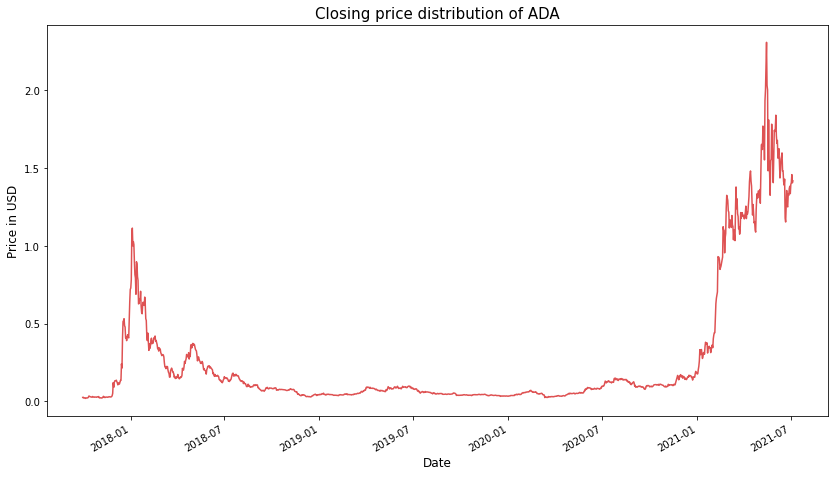

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of ADA", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of ADA')

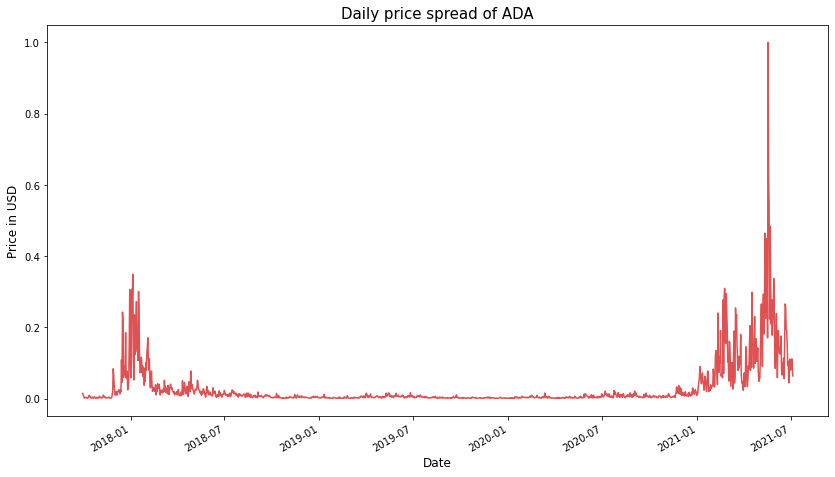

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of ADA", fontsize=15)

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
temp_base_df

,open,high,low,close,adjclose,volume,ticker
2017-09-30,0.021678,0.032226,0.017354,0.024969,0.024969,5.006870e+07,ADA-USD
2017-10-01,0.024607,0.030088,0.019969,0.025932,0.025932,5.764130e+07,ADA-USD
2017-10-02,0.025757,0.027425,0.020690,0.020816,0.020816,1.699780e+07,ADA-USD
2017-10-03,0.020864,0.022806,0.020864,0.021931,0.021931,9.000050e+06,ADA-USD
2017-10-04,0.021951,0.022154,0.020859,0.021489,0.021489,5.562510e+06,ADA-USD
...,...,...,...,...,...,...,...
2021-07-01,1.332942,1.394397,1.286607,1.394397,1.394397,2.159410e+09,ADA-USD
2021-07-02,1.394152,1.441714,1.359664,1.406836,1.406836,2.028094e+09,ADA-USD
2021-07-03,1.404008,1.493717,1.382153,1.458184,1.458184,1.806362e+09,ADA-USD
2021-07-04,1.461221,1.461221,1.379284,1.404898,1.404898,1.759461e+09,ADA-USD


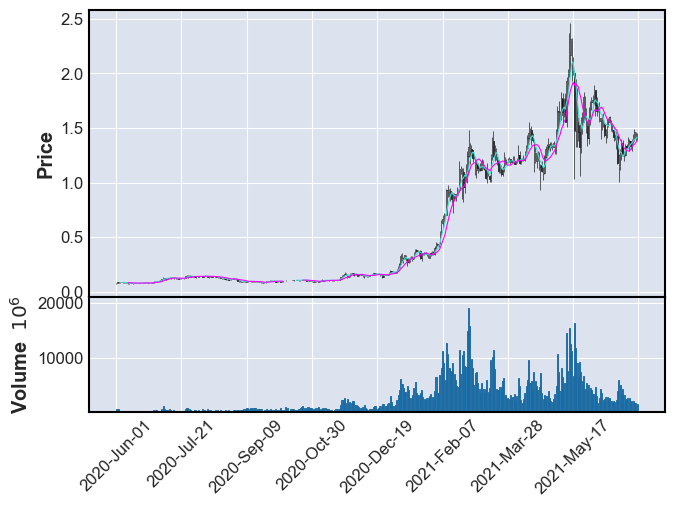

In [7]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [8]:
from fbprophet import Prophet

In [9]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
976,2020-06-02,0.085439
977,2020-06-03,0.089000
978,2020-06-04,0.085442
979,2020-06-05,0.086026
980,2020-06-06,0.086654
...,...,...
1370,2021-07-01,1.394397
1371,2021-07-02,1.406836
1372,2021-07-03,1.458184
1373,2021-07-04,1.404898


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
423,2021-07-31,1.560085,1.381996,1.739470
424,2021-08-01,1.551899,1.362110,1.733491
425,2021-08-02,1.549622,1.358582,1.742533
426,2021-08-03,1.550966,1.363181,1.739589
427,2021-08-04,1.569302,1.370198,1.755483


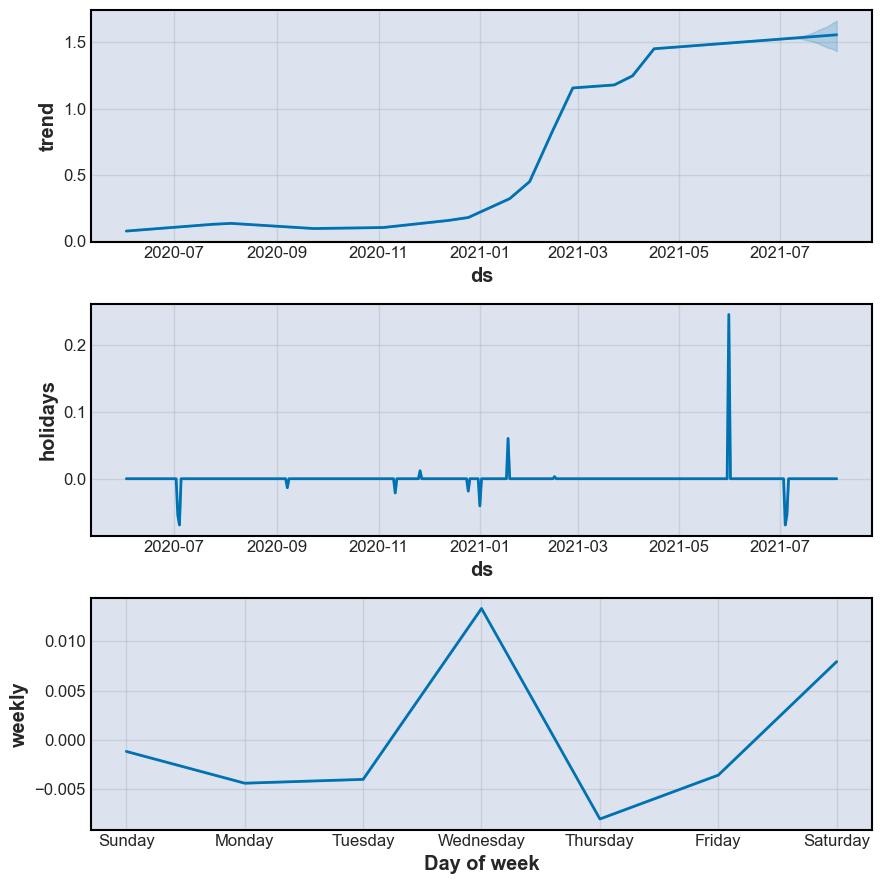

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

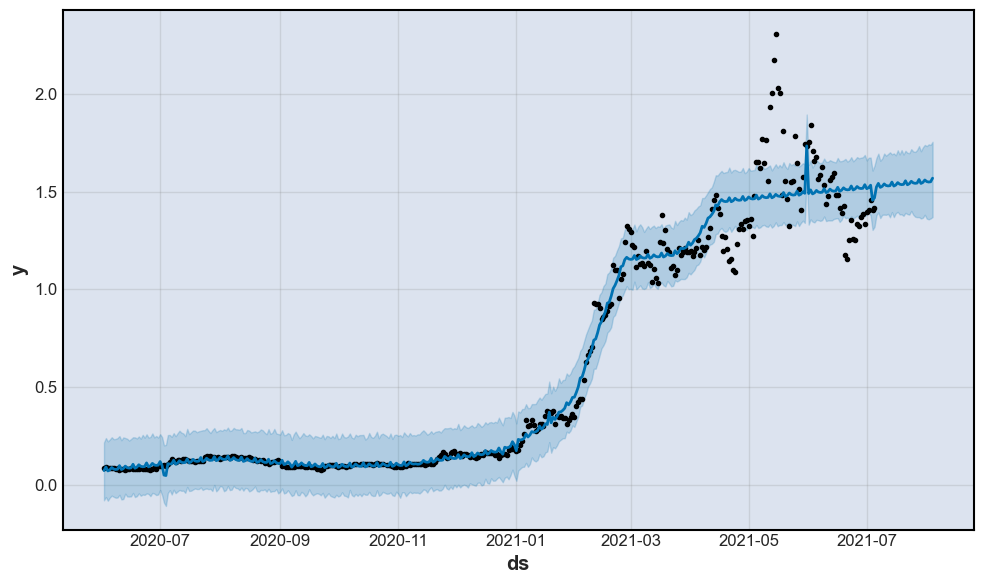

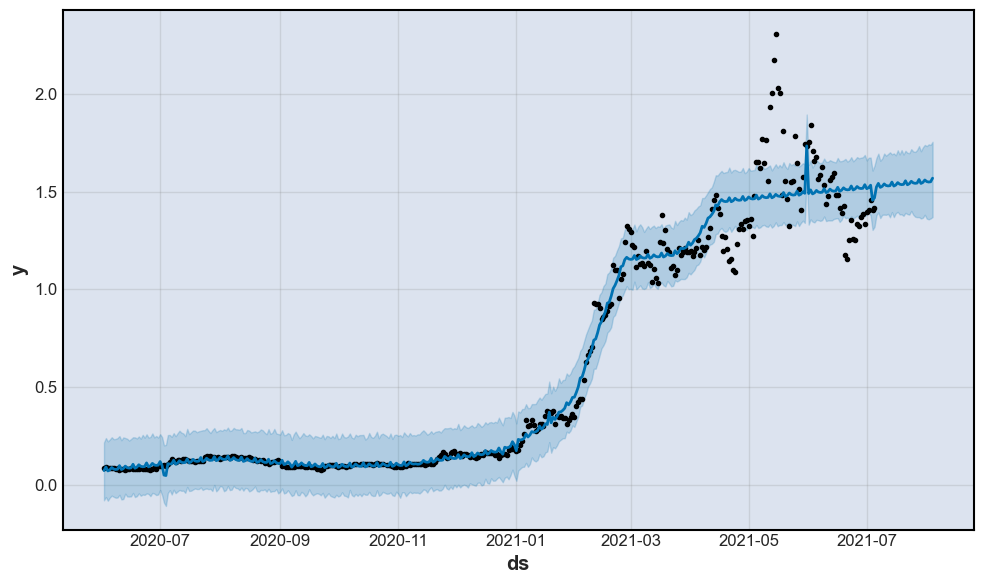

In [11]:
m.plot(forecast)